## **Aqui nós Conhecemos o parametro n_lags que se baseia nos residos, a diferença entre o modelo predito e os dados reais, conhecendo os residuos e aplicando um bom n_lags pode elevar muito sua predição.**

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

In [3]:
#carregando df
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

In [4]:
df

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91
...,...,...
1457,2018-12-27,72.96
1458,2018-12-28,69.23
1459,2018-12-29,62.62
1460,2018-12-30,64.57


In [5]:
 #Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("plotly")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 173
INFO:NP.config:Auto-set epochs to 173
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate f

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


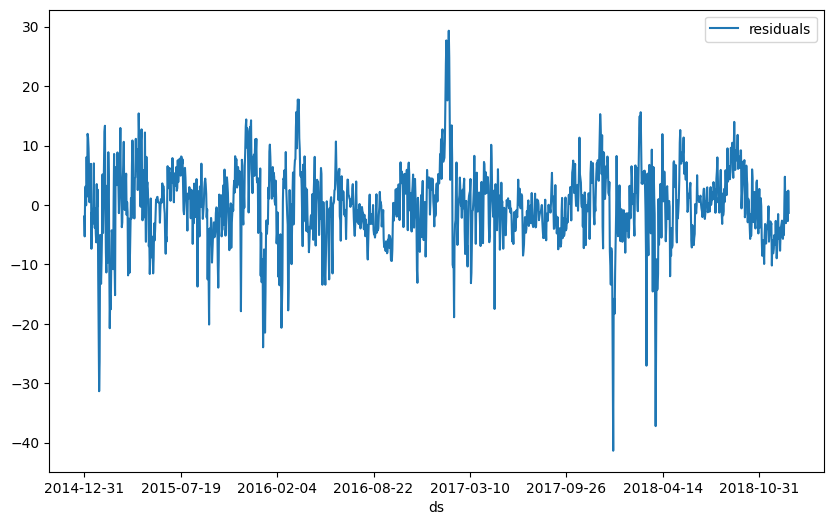

In [6]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

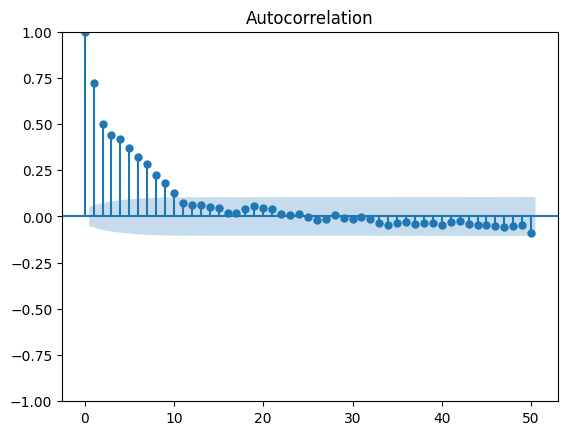

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals["residuals"], lags=50)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - A

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


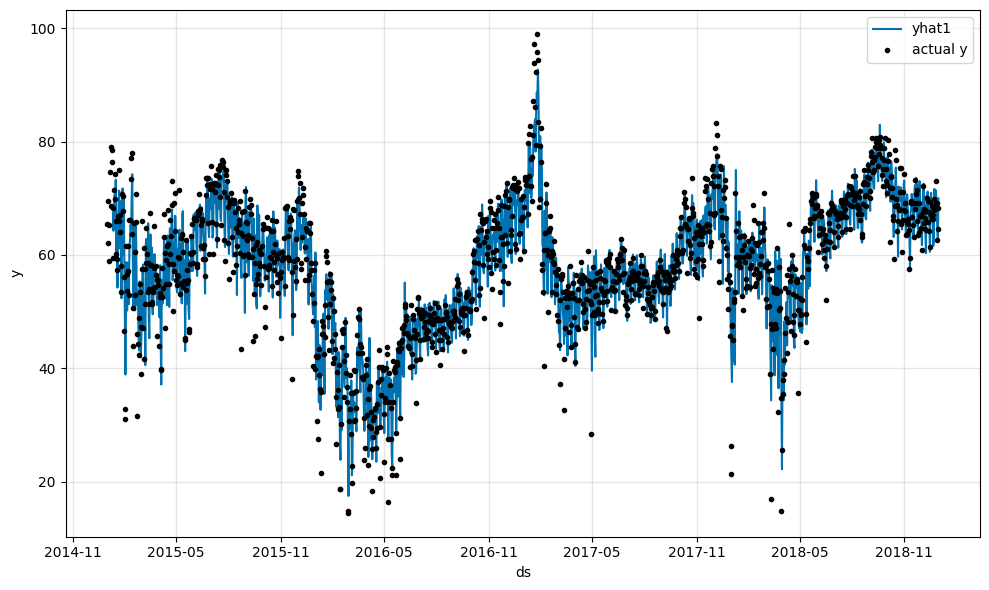

In [8]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


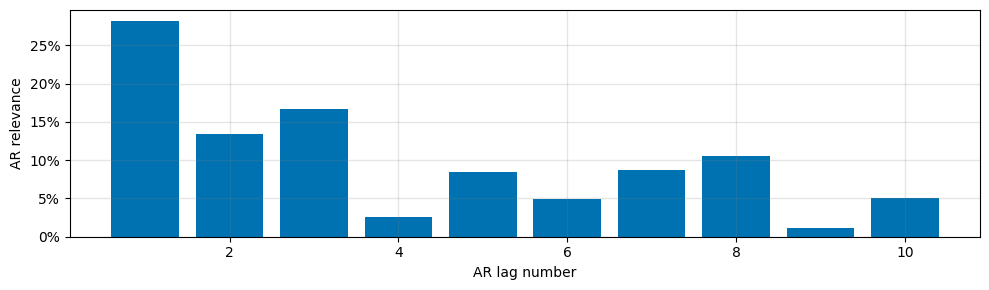

In [9]:
m.plot_parameters(components=["autoregression"])

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


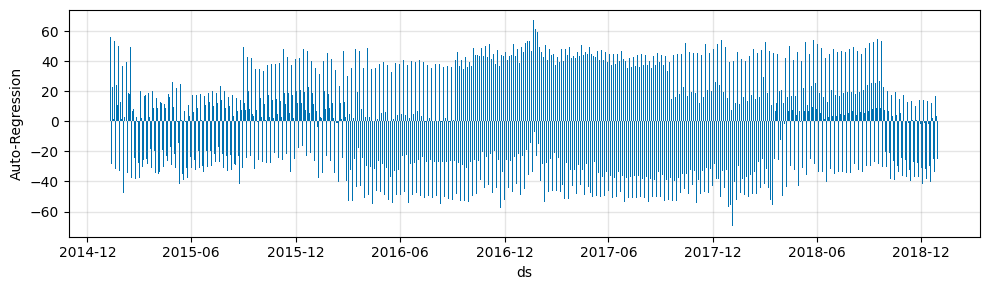

In [10]:
m.plot_components(forecast, components=["autoregression"])